In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('Online Retail.xlsx')

In [3]:
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df = df.drop('Description', axis=1)
display(df.head())

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
latest_date = df['InvoiceDate'].max()

recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (latest_date - recency_df['InvoiceDate']).dt.days

display(recency_df.head())

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [7]:
frequency_df = df.groupby('CustomerID').size().reset_index(name='Frequency')
display(frequency_df.head())

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [8]:
df['Monetary'] = df['Quantity'] * df['UnitPrice']
monetary_df = df.groupby('CustomerID')['Monetary'].sum().reset_index()
display(monetary_df.head())

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [9]:
rfm_df = recency_df.merge(frequency_df, on='CustomerID')
rfm_df = rfm_df.merge(monetary_df, on='CustomerID')
display(rfm_df)

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:17:00,325,2,0.00
1,12347.0,2011-12-07 15:52:00,1,182,4310.00
2,12348.0,2011-09-25 13:13:00,74,31,1797.24
3,12349.0,2011-11-21 09:51:00,18,73,1757.55
4,12350.0,2011-02-02 16:01:00,309,17,334.40
...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,10,180.60
4368,18281.0,2011-06-12 10:53:00,180,7,80.82
4369,18282.0,2011-12-02 11:43:00,7,13,176.60
4370,18283.0,2011-12-06 12:02:00,3,756,2094.88


In [10]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

display(rfm_df.head())

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346.0,2011-01-18 10:17:00,325,2,0.00,1,1,1
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,5,5,5
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,2,3,4
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,4,4,4
4,12350.0,2011-02-02 16:01:00,309,17,334.40,1,2,2


In [11]:
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

def rfm_segment(score):
    if score in ['555', '554', '544', '545', '454', '455', '445', '543', '444', '345', '354', '355', '344', '335', '334']:
        return 'loyal'
    elif score in ['535', '534', '435', '434', '333', '323', '512', '513', '514', '515', '521', '522', '523', '524', '525', '531', '532', '411', '412', '413', '414', '415', '421', '422', '423', '424', '425', '431', '432']:
        return 'returning'
    elif score in ['311', '312', '313', '314', '315', '321', '322', '324', '325', '211', '212', '213', '214', '215', '221', '222', '223', '224', '225', '111', '112', '113', '114', '115', '121', '122', '123', '124', '125', '131', '132', '133', '134', '135', '141', '142', '143', '144', '145', '151', '152', '153', '154', '155']:
        return 'inactive'
    else:
        return 'inactive'

rfm_df['Customer_Segment'] = rfm_df['RFM_Score'].apply(rfm_segment)

display(rfm_df['Customer_Segment'].value_counts())

,count
Customer_Segment,
inactive,2476
loyal,1273
returning,623


In [12]:
display(rfm_df[['CustomerID', 'RFM_Score', 'Customer_Segment']])

,CustomerID,RFM_Score,Customer_Segment
0,12346.0,111,inactive
1,12347.0,555,loyal
2,12348.0,234,inactive
3,12349.0,444,loyal
4,12350.0,122,inactive
...,...,...,...
4367,18280.0,111,inactive
4368,18281.0,111,inactive
4369,18282.0,511,inactive
4370,18283.0,555,loyal


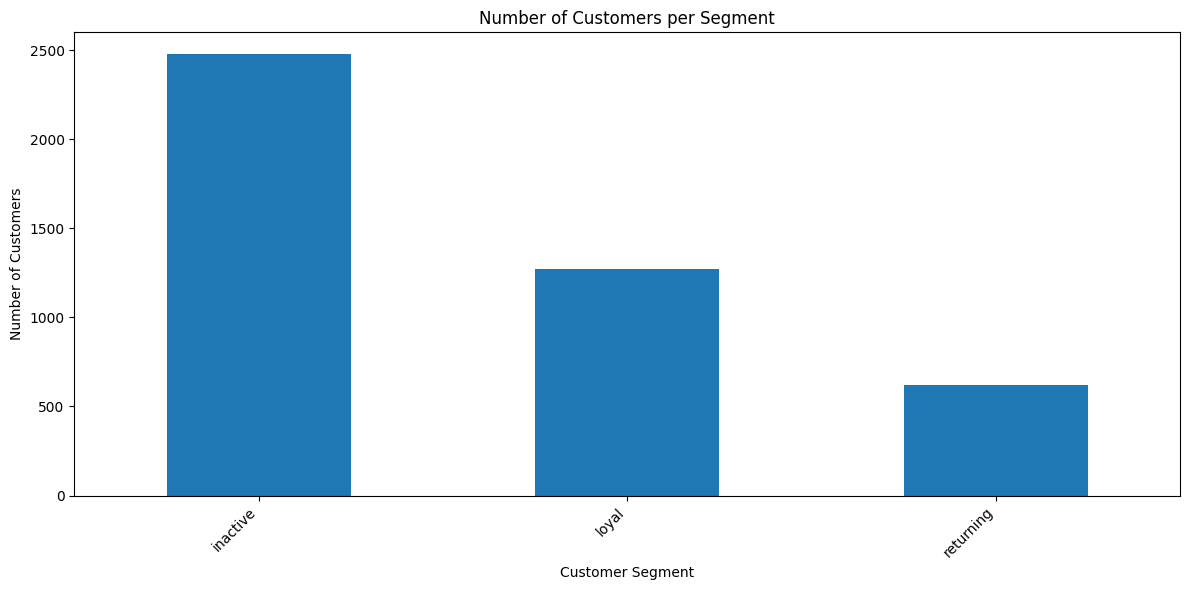

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate segment counts and characteristics based on new categories
segment_counts = rfm_df['Customer_Segment'].value_counts()
segment_characteristics = rfm_df.groupby('Customer_Segment')[['Recency', 'Frequency', 'Monetary']].mean()

plt.figure(figsize=(12, 6))
segment_counts.plot(kind='bar')
plt.title('Number of Customers per Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


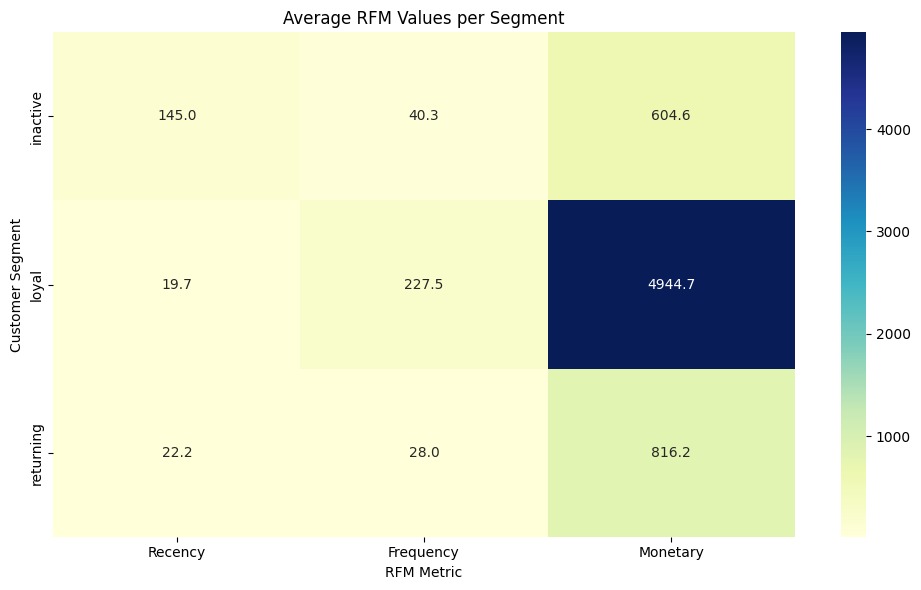

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(segment_characteristics, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average RFM Values per Segment')
plt.xlabel('RFM Metric')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()

In [15]:
# Calculate segment characteristics based on new categories
segment_characteristics = rfm_df.groupby('Customer_Segment')[['Recency', 'Frequency', 'Monetary']].mean()
display(segment_characteristics)

print("\nMarketing Suggestions:")
print("\nLoyal Customers:")
print("- Reward them with loyalty programs and exclusive offers.")
print("- Give them early access to new products or sales.")
print("- Encourage them to refer new customers.")

print("\nReturning Customers:")
print("- Engage them with personalized recommendations based on their past purchases.")
print("- Offer small discounts or incentives for repeat purchases.")
print("- Collect feedback to understand their needs better.")

print("\nInactive Customers:")
print("- Send re-engagement campaigns with special promotions or discounts to encourage them to return.")
print("- Highlight new products or services they might be interested in.")
print("- Consider surveying them to understand why they haven't purchased recently.")

,Recency,Frequency,Monetary
Customer_Segment,,,
inactive,145.037964,40.305735,604.593596
loyal,19.710134,227.470542,4944.693559
returning,22.235955,28.028892,816.207337



Marketing Suggestions:

Loyal Customers:
- Reward them with loyalty programs and exclusive offers.
- Give them early access to new products or sales.
- Encourage them to refer new customers.

Returning Customers:
- Engage them with personalized recommendations based on their past purchases.
- Offer small discounts or incentives for repeat purchases.
- Collect feedback to understand their needs better.

Inactive Customers:
- Send re-engagement campaigns with special promotions or discounts to encourage them to return.
- Highlight new products or services they might be interested in.
- Consider surveying them to understand why they haven't purchased recently.
